# A "Regular" magnetic field 
We can also use large scale coherent models for the magnetic field. One particular model that ships with the code is that used by [Libanov \& Troitsky (2021)](https://www.sciencedirect.com/science/article/pii/S0370269320300563?via%3Dihub), which is originally described by [Gourgouliatos et al. (2010)](https://arxiv.org/abs/1008.5353).  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

In [2]:
# load data from Marsh and Libanov codes

s = alpro.Survival("libanov")
s.setup_regular_model()

Let's plot the magnetic field components at the default 45 degree viewing angle

Text(0.5, 0, '$z$ (kpc)')

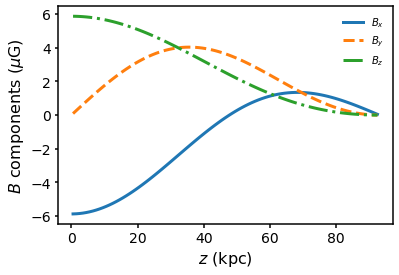

In [3]:
plt.plot(s.domain.rcen, 1e6 * s.domain.Bx, label = "$B_x$")
plt.plot(s.domain.rcen, 1e6 * s.domain.By, ls="--", label = "$B_y$")
plt.plot(s.domain.rcen, 1e6 * s.domain.Bz, ls="-.", label = "$B_z$")
plt.ylabel("$B$ components ($\mu$G)")
plt.legend(frameon=False)
plt.xlabel("$z$ (kpc)")

We can then compute the survival probability

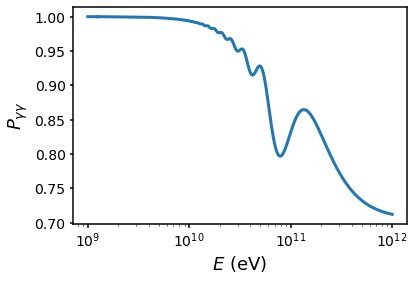

In [4]:
s.set_params(mass = 1e-8, g = 1e-11 * 1e-9)
energies = np.logspace(9,12,1000)
s.propagate(energies = energies)
fig = s.default_plot(mode = "survival")

We can change the viewing angle through the theta keyword

Text(0.5, 0, '$z$ (kpc)')

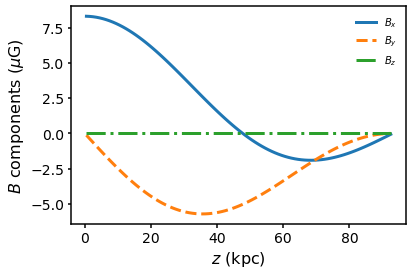

In [5]:
s.domain.create_libanov_field(theta=3.0*np.pi/2.0)
plt.plot(s.domain.rcen, 1e6 * s.domain.Bx, label = "$B_x$")
plt.plot(s.domain.rcen, 1e6 * s.domain.By, ls="--", label = "$B_y$")
plt.plot(s.domain.rcen, 1e6 * s.domain.Bz, ls="-.", label = "$B_z$")
plt.ylabel("$B$ components ($\mu$G)")
plt.legend(frameon=False)
plt.xlabel("$z$ (kpc)")

Which means we can also plot the components for all $r,\theta$. 

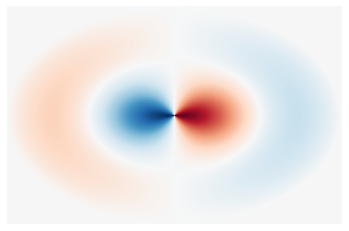

In [6]:
x, y = np.linspace(-93,93,1000), np.linspace(-93,93,1000)
xx, yy = np.meshgrid(x,y)
r = np.sqrt(xx**2 + yy**2)
theta = np.arctan2(xx,yy)

Btheta, Bphi, Br = alpro.models.get_libanov_B(r, theta)
plt.pcolormesh(x, y, 1e6 * Btheta, cmap="RdBu")
_ = plt.axis("off")

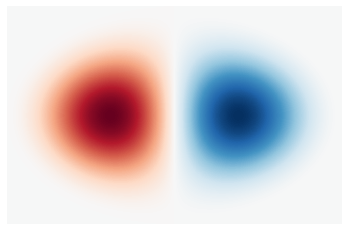

In [7]:
plt.pcolormesh(x, y, 1e6 * Bphi, cmap="RdBu")
_ = plt.axis("off")